# AF - Inteligência Analítica - Avaliar dados de pacientes

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<code> Lendo o arquivo e eliminando as linhas vazias do csv</code>

In [5]:
data = pd.read_csv('meddados1.csv', header=[0], encoding = 'ISO-8859-1',sep=';')
data = data.dropna()

### Gerando a Tabela de Stats

In [6]:
data.describe()

,Genero_M_1,Idade,Altura,Peso pré-cirurgia,Peso pós-cirurgia,Redução de peso,Glicemia,Ativ fis_S_1,Fumo_S1,HAS_S1,DM_S1,Escore de QV
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,0.588889,50.633333,1.626889,64.393333,59.906667,4.486667,109.222222,0.233333,0.133333,0.188889,0.255556,59.233333
std,0.494792,14.716382,0.101965,13.447257,12.507084,0.956609,26.435326,0.425322,0.341839,0.393613,0.438617,14.899702
min,0.000000,20.000000,1.370000,36.500000,33.900000,2.600000,67.000000,0.000000,0.000000,0.000000,0.000000,24.000000
25%,0.000000,38.250000,1.550000,52.925000,49.225000,3.700000,93.250000,0.000000,0.000000,0.000000,0.000000,47.250000
50%,1.000000,51.500000,1.635000,62.600000,58.650000,4.350000,102.000000,0.000000,0.000000,0.000000,0.000000,59.000000
75%,1.000000,64.000000,1.700000,74.525000,69.325000,5.200000,117.500000,0.000000,0.000000,0.000000,0.750000,66.000000
max,1.000000,75.000000,1.800000,93.800000,87.200000,6.600000,231.000000,1.000000,1.000000,1.000000,1.000000,96.000000


In [7]:
data.head()

,Genero_M_1,Idade,Altura,Peso pré-cirurgia,Peso pós-cirurgia,Redução de peso,Glicemia,Ativ fis_S_1,Fumo_S1,HAS_S1,DM_S1,Escore de QV
1,1.0,71.0,1.65,88.1,81.9,6.2,142.0,0.0,1.0,1.0,0.0,74.0
3,1.0,51.0,1.71,69.7,64.8,4.9,87.0,1.0,1.0,0.0,0.0,46.0
5,1.0,74.0,1.80,72.0,67.0,5.0,106.0,0.0,1.0,0.0,1.0,24.0
7,1.0,50.0,1.80,78.0,72.5,5.5,124.0,0.0,0.0,0.0,0.0,78.0
9,1.0,52.0,1.37,52.0,48.4,3.6,88.0,0.0,0.0,0.0,0.0,45.0


## Verificando as correlações entre as variaveis

Text(0.5, 0.98, 'Correlação dos dados de pacientes')

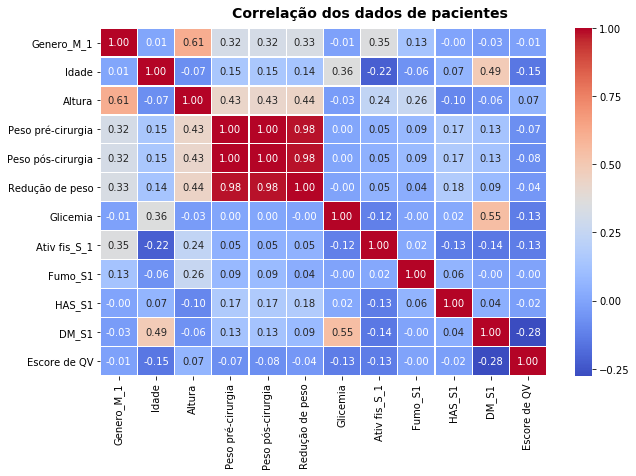

In [8]:
fig, (ax) = plt.subplots(1, 1, figsize=(10,6))

hm = sns.heatmap(data.corr(), 
                 ax=ax,           
                 cmap="coolwarm", 
                 annot=True, 
                 fmt='.2f',       # formatação
                 linewidths=.05)

fig.subplots_adjust(top=0.93)
fig.suptitle('Correlação dos dados de pacientes', 
              fontsize=14, 
              fontweight='bold')

<code> Podemos ver que as maiores correlações são de Altura com genero, obviamente Sexo masculino +alto, 
 mas uma leve correçação é notada com perda de peso na altura tb, O que seria DB_S1 ??? </code>


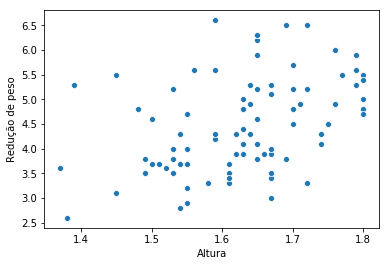

In [9]:
sns.scatterplot( data.Altura,data['Redução de peso'])

<code> Aqui claramente vemos a correlação e altura e redução de peso, como diz a máxima: 
    correlação não é causalidade.</code>

Text(0.5, 0.98, 'Mostrando a inclinação linear entre as features')

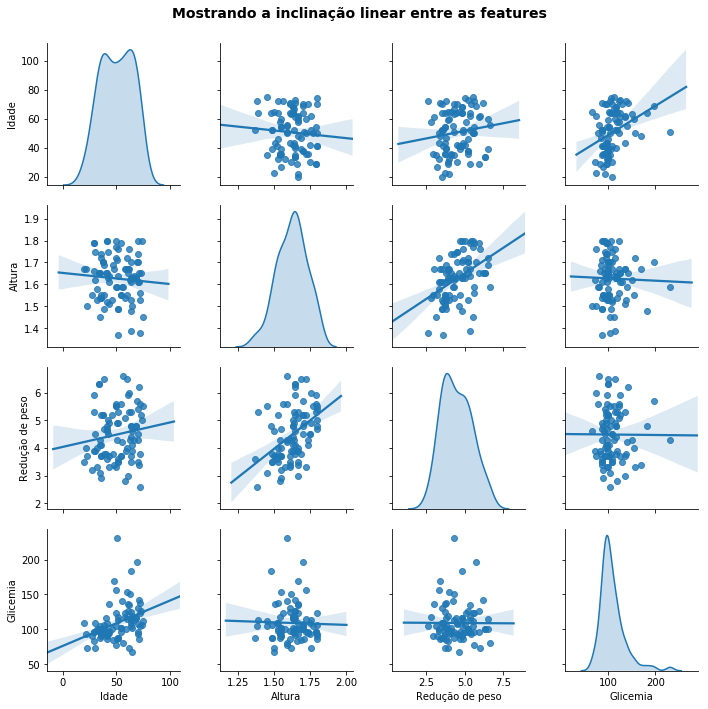

In [19]:
cols = ['Idade',	'Altura',	'Redução de peso',	'Glicemia']
pp = sns.pairplot(data[cols], 
                  diag_kws=dict(shade=True), 
                  diag_kind="kde",
                  kind="reg")

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('Mostrando a inclinação linear entre as features', fontsize=14, fontweight='bold')

## Vamos ver o History de cada feature?

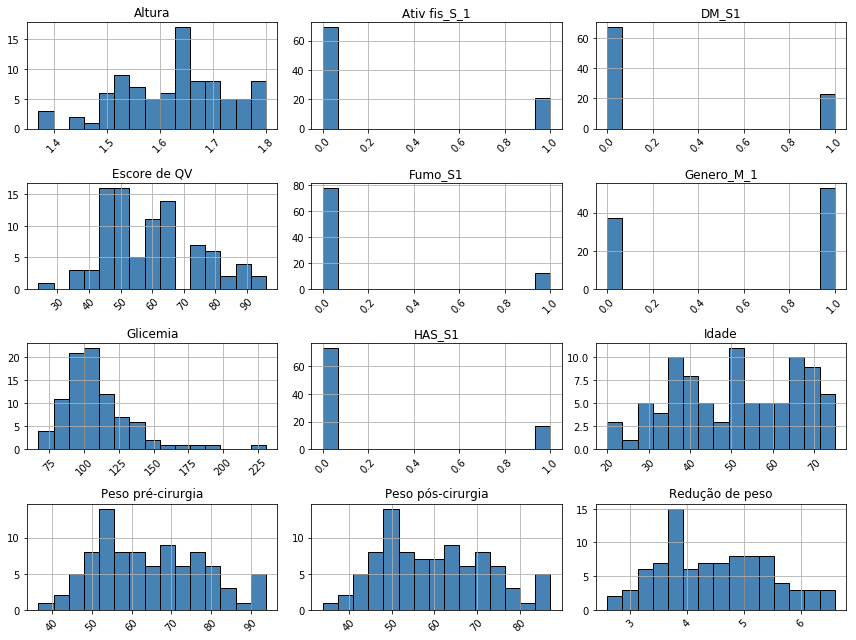

In [23]:
fig = data.hist(bins=15,
                 color='steelblue',
                 edgecolor='black', linewidth=1.0,
                 xlabelsize=10, ylabelsize=10,
                 xrot=45, yrot=0,
                 figsize=(8,6),
                 grid=True)
plt.tight_layout(rect=(0, 0, 1.5, 1.5))


## Observando as algumas relações entre as features, (já vimos nas correlações mas é sempre interessante observar os dados.

In [24]:
bins = [2,3,4,5,7]
labels =['muito pouco','media', 'acima','alto']
data['faixa_grupo'] = pd.cut(data['Redução de peso'], bins=bins, labels=labels, right=False)
glibins = [60,80,100,200,400]
glilabels = ['baixa', 'normal', 'Resistencia', 'Altíssima']
data['faixa_glicemica'] = pd.cut(data.Glicemia, bins=glibins, labels=glilabels, right=False)

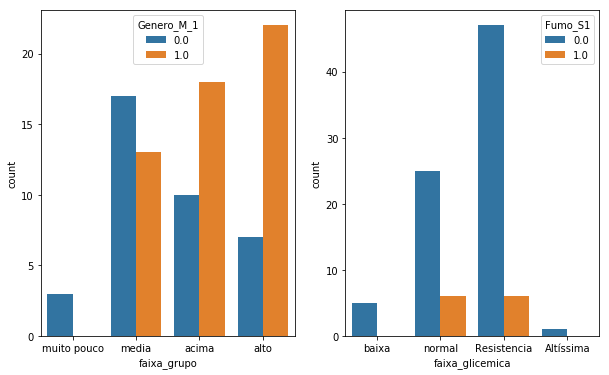

In [30]:
fig, axs = plt.subplots(1,2,figsize=(10,6))
sns.countplot( data.faixa_grupo, hue=data['Genero_M_1'],ax=axs[0])
sns.countplot(data.faixa_glicemica, hue=data.Fumo_S1, ax=axs[1])


### Rodando uma regressão para checar os coeficientes se poderíamos ter um modelo coerente com altura-redução

In [31]:
import statsmodels.api as sm
import numpy as np

### Separando as features do label

In [54]:
data.head()

,Genero_M_1,Idade,Altura,Peso pré-cirurgia,Peso pós-cirurgia,Redução de peso,Glicemia,Ativ fis_S_1,Fumo_S1,HAS_S1,DM_S1,Escore de QV,faixa_grupo,faixa_glicemica
1,1.0,71.0,1.65,88.1,81.9,6.2,142.0,0.0,1.0,1.0,0.0,74.0,alto,Resistencia
3,1.0,51.0,1.71,69.7,64.8,4.9,87.0,1.0,1.0,0.0,0.0,46.0,acima,normal
5,1.0,74.0,1.80,72.0,67.0,5.0,106.0,0.0,1.0,0.0,1.0,24.0,alto,Resistencia
7,1.0,50.0,1.80,78.0,72.5,5.5,124.0,0.0,0.0,0.0,0.0,78.0,alto,Resistencia
9,1.0,52.0,1.37,52.0,48.4,3.6,88.0,0.0,0.0,0.0,0.0,45.0,media,normal


In [55]:
X = data[data.columns.difference(['Redução de peso','Peso pré-cirurgia','Peso pós-cirurgia','faixa_grupo','faixa_glicemica'])]
y = data['Redução de peso']
X = sm.add_constant(X)
model = sm.OLS(y,X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Redução de peso   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     3.580
Date:                Tue, 09 Apr 2019   Prob (F-statistic):           0.000880
Time:                        18:33:00   Log-Likelihood:                -107.98
No. Observations:                  90   AIC:                             236.0
Df Residuals:                      80   BIC:                             261.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.5550      1.922     -1.329      0.188      -6.381       1.271
Altura           4.2955      1.170      3.672      0.000       1.968       6.623
Ativ fis_S_1    -0.0672      0.241     -0.280      0.781      -0.546       0.411
DM_S1            0.1921      0.274      0.701      0.485      -0.353       0.737
Escore de QV    -0.0027      0.006     -0.421      0.675      -0.016       0.010
Fumo_S1         -0.2728      0.276     -0.989      0.326      -0.822       0.276
Genero_M_1       0.1524      0.243      0.627      0.532      -0.331       0.636
Glicemia        -0.0036      0.004     -0.874      0.385      -0.012       0.005
HAS_S1           0.5190      0.235      2.212      0.030       0.052       0.986
Idade            0.0084      0.007      1.150      0.254      -0.006       0.023
==============================================================================
Omnibus:                        2.953   Durbin-Watson:                   1.652
Prob(Omnibus):                  0.228   Jarque-Bera (JB):                2.637
Skew:                           0.419   Prob(JB):                        0.267
Kurtosis:                       3.006   Cond. No.                     3.38e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
y_pred = result.fittedvalues
residuais = y - y_pred

0.9822023617422091

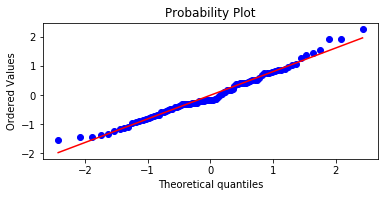

In [65]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residuais, plot=ax, fit=True)
r**2